In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
df = web.DataReader('LT.NS', data_source='yahoo',start='2012-01-01', end='2022-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,451.111115,440.311096,445.333344,448.466675,3307961.0,381.391357
2012-01-03,473.200012,453.333344,454.177765,471.488892,5295413.0,400.970184
2012-01-04,479.066681,467.111115,473.066681,475.488892,5844006.0,404.371918
2012-01-05,486.666656,473.377777,475.555542,483.466675,5904018.0,411.156555
2012-01-06,485.555542,471.577789,479.555542,480.666656,3931557.0,408.775330
...,...,...,...,...,...,...
2022-02-28,1822.250000,1752.800049,1764.900024,1816.750000,2553662.0,1816.750000
2022-03-02,1826.949951,1768.500000,1800.000000,1784.500000,3152628.0,1784.500000
2022-03-03,1813.550049,1745.550049,1810.000000,1752.300049,2259979.0,1752.300049


In [4]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2008

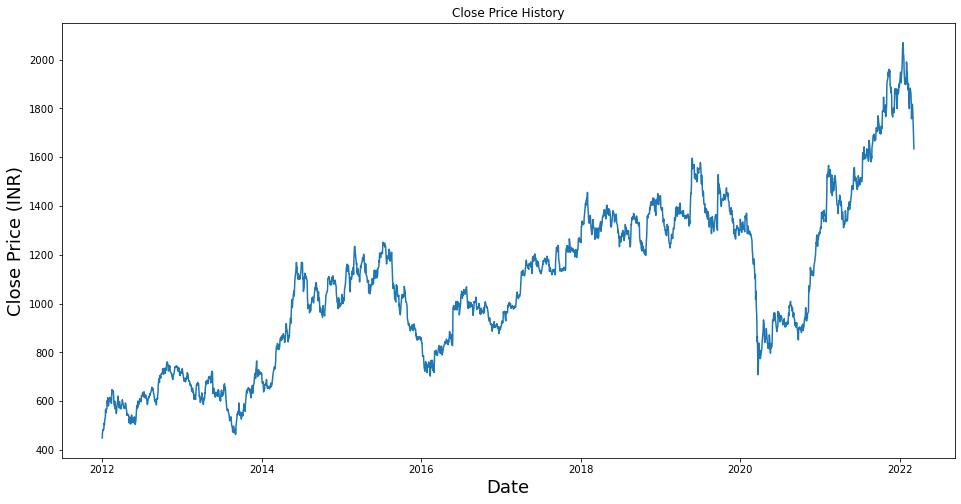

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.01420306],
       [0.01667078],
       ...,
       [0.80437204],
       [0.77935556],
       [0.73166695]])

In [7]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.01420306, 0.01667078, 0.0215925 , 0.01986509,
       0.02167476, 0.03420525, 0.037852  , 0.03365687, 0.04481641,
       0.05283648, 0.0708371 , 0.06348878, 0.07351044, 0.07275645,
       0.0735516 , 0.09399248, 0.08819337, 0.10212224, 0.08122894,
       0.08273696, 0.09203204, 0.09680292, 0.09474651, 0.10306819,
       0.09471909, 0.09828356, 0.09492472, 0.09375943, 0.08752158,
       0.10157384, 0.12230266, 0.1205067 , 0.12012285, 0.12001316,
       0.11350115, 0.10704396, 0.09310135, 0.08029666, 0.09315621,
       0.08198293, 0.07371611, 0.07967973, 0.07065888, 0.06196705,
       0.06265251, 0.08042005, 0.09321104, 0.09669327, 0.10626252,
       0.09663841, 0.08525953, 0.07882976, 0.07623865, 0.09249817,
       0.07892574, 0.07996763, 0.07422335, 0.08065313, 0.0819144 ])]
[0.07444272531504437]



In [8]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1948, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1948/1948 [==============================] - 36s 17ms/step - loss: 0.0014


In [13]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.1192496598599675

C:\Users\kapoo\AppData\Local\Temp/ipykernel_13472/3428246292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


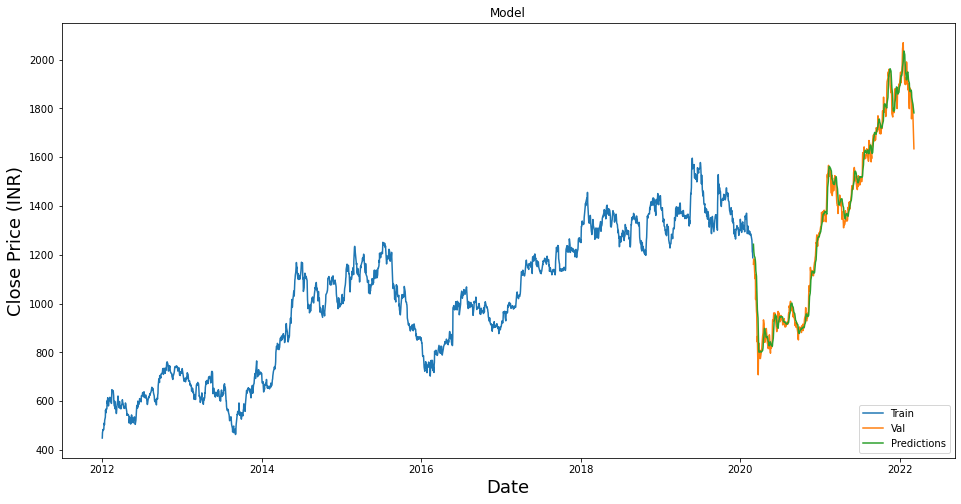

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2020-03-02,1160.900024,1242.968140
2020-03-03,1181.300049,1224.795776
2020-03-04,1176.650024,1211.177124
2020-03-05,1182.449951,1200.989136
2020-03-06,1158.900024,1194.962402
...,...,...
2022-02-28,1816.750000,1827.966187
2022-03-02,1784.500000,1819.578613
2022-03-03,1752.300049,1811.363037


In [26]:
lt_quote = web.DataReader('LT.NS', data_source='yahoo',start='2012-01-01', end='2022-03-07')
new_df = lt_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1751.011]]


In [27]:
lt_quote2 = web.DataReader('LT.NS', data_source='yahoo',start='2022-03-01', end='2022-03-07')
print(lt_quote2['Close'])

Date
2022-03-02    1784.500000
2022-03-03    1752.300049
2022-03-04    1711.750000
2022-03-07    1634.449951
Name: Close, dtype: float64
